In [44]:
import pickle
out_fp = "../../data/grmesa_confidence.pkl"
grmesa_confidence = pickle.load(open(out_fp, 'rb'))

<AxesSubplot:>

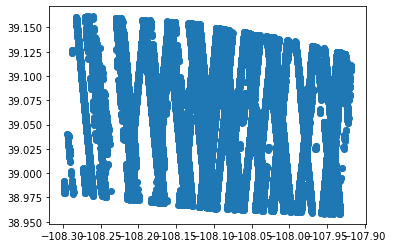

In [46]:
grmesa_confidence.plot()

In [9]:
pwd

'/home/jovyan/isce_sat2/contributors/sam'

In [48]:
import rasterio as rio
from rasterio.plot import show
fn = '/home/jovyan/isce_sat2/contributors/sam/download/grmesa_27416_20003-028_20005-007_0011d_s01_L090_01_int_grd/grmesa_27416_20003-028_20005-007_0011d_s01_L090HH_01.cor.grd.tiff'

src = rio.open(fn)

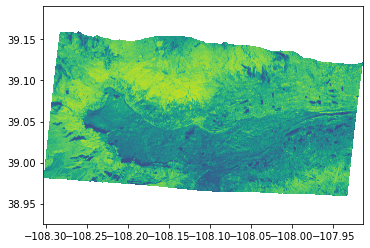

<AxesSubplot:>

In [49]:
show(src)

In [55]:
import geopandas as gpd
import pandas as pd

df = pd.DataFrame(
    {'Point Number': [1, 2, 3, 4],
     'Latitude': [39.1, 39.1, 39.1, 39.1],
     'Longitude': [-108.25, -108.2, -108.1, -108]})

test_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))



<AxesSubplot:>

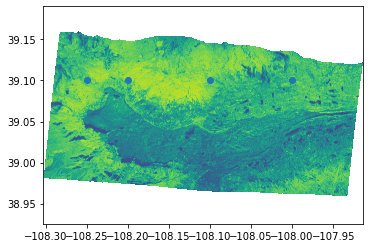

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 4))

# Plot Near IR, Red, Green and Blue (rgb)
show((src), ax=ax)
test_gdf.plot(ax=ax)

In [58]:
import numpy as np
import os


# This function written by David Shean, UW
src = rio.open(fn)
def sample_raster(df, src, diff_col=None):
    #df_proj = df.to_crs(src.crs)
    coord = [(pt.x, pt.y) for pt in df.to_crs(src.crs).geometry]
    s = np.fromiter(src.sample(coord), dtype=src.dtypes[0])
    #s[s == src.nodata] = np.nan
    sm = np.ma.masked_equal(s, src.nodata)
    sample_colname = os.path.splitext(os.path.split(src.name)[-1])[0]
    df[sample_colname] = sm
    if diff_col is not None:
        out_colname = '{} {} diff'.format(diff_col, sample_colname)
        df[out_colname] = df[diff_col] - df[sample_colname]
    else:
        out_colname = sample_colname
    return out_colname


In [59]:
test_gdf = test_gdf.set_crs('epsg:4326')

In [60]:
print(test_gdf.crs)

epsg:4326


In [61]:
sample_raster(test_gdf, src)

'grmesa_27416_20003-028_20005-007_0011d_s01_L090HH_01.cor.grd'

In [62]:
test_gdf.head()

,Point Number,Latitude,Longitude,geometry,grmesa_27416_20003-028_20005-007_0011d_s01_L090HH_01.cor.grd
0,1,39.1,-108.25,POINT (-108.25000 39.10000),0.793175
1,2,39.1,-108.20,POINT (-108.20000 39.10000),0.881858
2,3,39.1,-108.10,POINT (-108.10000 39.10000),0.710891
3,4,39.1,-108.00,POINT (-108.00000 39.10000),0.410808


<AxesSubplot:>

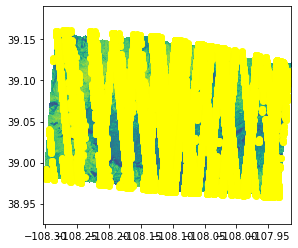

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 4))

# Plot Near IR, Red, Green and Blue (rgb)
show((src), ax=ax)
grmesa_confidence.plot(ax=ax, color='yellow')

In [54]:
grmesa_confidence.head()


,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,distance,h_mean,rms_misfit,delta_time,gt,geometry,confidence
time,,,,,,,,,,,,,,,,,
2018-10-17 22:31:18.451049752,12,0.0,0.091676,1,2,295,216256,0,3.111202,0.025380,4.336883e+06,1774.852969,0.312240,2.505068e+07,50,POINT (-108.29836 38.98137),2
2018-10-17 22:31:18.458099976,18,0.0,0.048823,1,2,295,216258,0,3.000000,0.021470,4.336933e+06,1776.170553,0.205758,2.505068e+07,50,POINT (-108.29841 38.98182),2
2018-10-17 22:31:18.465141600,17,0.0,0.032050,1,2,295,216261,0,3.000000,0.027447,4.336983e+06,1777.465900,0.123890,2.505068e+07,50,POINT (-108.29847 38.98227),2
2018-10-17 22:31:18.472171260,10,0.0,0.106630,1,2,295,216263,0,3.000000,0.025624,4.337033e+06,1778.813468,0.336372,2.505068e+07,50,POINT (-108.29852 38.98272),2
2018-10-17 22:31:18.479208480,18,0.0,0.104997,1,2,295,216265,0,3.000000,0.049735,4.337083e+06,1780.784068,0.368985,2.505068e+07,50,POINT (-108.29858 38.98317),2


In [63]:
sample_raster(grmesa_confidence, src)

'grmesa_27416_20003-028_20005-007_0011d_s01_L090HH_01.cor.grd'

In [64]:
grmesa_confidence.head()

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,distance,h_mean,rms_misfit,delta_time,gt,geometry,confidence,grmesa_27416_20003-028_20005-007_0011d_s01_L090HH_01.cor.grd
time,,,,,,,,,,,,,,,,,,
2018-10-17 22:31:18.451049752,12,0.0,0.091676,1,2,295,216256,0,3.111202,0.025380,4.336883e+06,1774.852969,0.312240,2.505068e+07,50,POINT (-108.29836 38.98137),2,0.515718
2018-10-17 22:31:18.458099976,18,0.0,0.048823,1,2,295,216258,0,3.000000,0.021470,4.336933e+06,1776.170553,0.205758,2.505068e+07,50,POINT (-108.29841 38.98182),2,0.451075
2018-10-17 22:31:18.465141600,17,0.0,0.032050,1,2,295,216261,0,3.000000,0.027447,4.336983e+06,1777.465900,0.123890,2.505068e+07,50,POINT (-108.29847 38.98227),2,0.649767
2018-10-17 22:31:18.472171260,10,0.0,0.106630,1,2,295,216263,0,3.000000,0.025624,4.337033e+06,1778.813468,0.336372,2.505068e+07,50,POINT (-108.29852 38.98272),2,0.855333
2018-10-17 22:31:18.479208480,18,0.0,0.104997,1,2,295,216265,0,3.000000,0.049735,4.337083e+06,1780.784068,0.368985,2.505068e+07,50,POINT (-108.29858 38.98317),2,0.747337


In [66]:
directory = '/home/jovyan/isce_sat2/contributors/sam/download/'

dirs = [x[0] for x in os.walk(directory)]

In [87]:
csv_path = dirs[1] + '/' + dirs[1].split('/')[-1] + '.csv'
#csv_path
cor_df = pd.read_csv(csv_path)
cor_df


,Unnamed: 0,uavsar rpi annotation file version number,site description,flight plan comments of pass 1,flight plan comments of pass 2,processing comments,url,slant range interferogram,slant range unwrapped phase,slant range correlation,...,grd_phs.val_maxv,slc_phs.val_mult,slc_phs.val_minv,slc_phs.val_maxv,dsp_cmap,slt_phs.dsp_cmap,grd_phs.dsp_cmap,slc_phs.dsp_cmap,set_hddr,set_tail
0,value,2.3,"Grand Mesa, CO",NaN,NaN,NaN,http://uavsar.jpl.nasa.gov/cgi-bin/product.pl?...,grmesa_27416_21019-017_21021-005_0006d_s01_L09...,grmesa_27416_21019-017_21021-005_0006d_s01_L09...,grmesa_27416_21019-017_21021-005_0006d_s01_L09...,...,3.14,1.0,-3.14,3.14,grey,cmy,cmy,cmy,0,0
1,units,-,&,&,&,&,&,&,&,&,...,rad,-,rad,rad,&,&,&,&,bytes,bytes
2,comment,uavsar rpi annotation file version number ...,site description ...,flight plan comments of pass 1 ...,flight plan comments of pass 2 ...,processing comments ...,url ...,file size 108953600 bytes,file size 54476800 bytes,file size 54476800 bytes,...,maximum value default for display,maximum value default for display,maximum value default for display,maximum value default for display,default grey color table,color table for interferogram phase,color table for interferogram phase,color table for interferogram phase,header bytes in raw data,tail bytes in raw data


In [98]:
start = cor_df['start time of acquisition for pass 1'][0]
start

'16-Mar-2021 16:39:43 UTC'

In [99]:
end = cor_df['stop time of acquisition for pass 2'][0]
end

'22-Mar-2021 15:33:21 UTC'

In [96]:
grmesa_confidence.index[0]

Timestamp('2018-10-17 22:31:18.451049752')

In [ ]:
from datetime import datetime

datetime_end = datetime.strptime(end, "%d-%b-%Y %H:%M:%S UTC")
datetime_start = datetime.strptime(start, "%d-%b-%Y %H:%M:%S UTC")

In [130]:
for i, r in grmesa_confidence.iterrows():
    current_dt = i.to_pydatetime()
    if current_dt > datetime_start and current_dt < datetime_end:
        print(current_dt)

/srv/conda/envs/notebook/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: UserWarning: Discarding nonzero nanoseconds in conversion.
  exec(code_obj, self.user_global_ns, self.user_ns)
